# Generative Deep Learning
# CIFAR 10 - Feedforward Network

In [371]:
import numpy as np

import torch
import torch.nn as nn
from torchsummary import summary
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

import torchvision.datasets as datasets
from torchvision import transforms

from sklearn.metrics import classification_report, confusion_matrix

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [212]:
cifar_train = datasets.CIFAR10('../data/cifar10', train=TruCIFARe, transform=None, target_transform=None, download=True)

Files already downloaded and verified


## Describe Data

In [345]:
print(f'Data source: {cifar_train.url}')
print(f'Training examples and size: {cifar_train.data.shape, type(cifar.data)}')
print(f'Number of Classes: {len(cifar_train.classes)}')
print(f'Classes: {cifar_train.classes}')

Data source: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Training examples and size: ((50000, 32, 32, 3), <class 'numpy.ndarray'>)
Number of Classes: 10
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [346]:
X = cifar_train.data
print(type(X))
y = cifar_train.targets
print(type(y))
classes = cifar_train.classes

<class 'numpy.ndarray'>
<class 'list'>


In [347]:
def display_grid(xs, titles, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(8,5))
    for r in range(rows):
        for c in range(cols):
            i = r * rows + c
            ax[r, c].imshow(xs[i], cmap='gray')
            ax[r, c].set_title(titles[i])
            ax[r, c].set_xticklabels([])
            ax[r, c].set_yticklabels([])
    fig.tight_layout()
    plt.show()

## Display some images

image size: (32, 32, 3) dtype=uint8


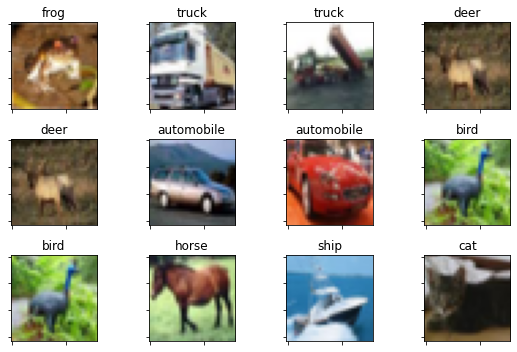

In [349]:
images, labels = [], []
for i in range(12):
    x_item, y_item = X[i] , classes[y[i]]
    images.append(x_item)
    labels.append(y_item)


print(f'image size: {images[0].shape} dtype={images[0].dtype}')
titles = [str(y_item) for y_item in labels]
display_grid(images, titles, 3, 4)

## Definig the Model

In [351]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        
        self.flatten = nn.Flatten()
        
        self.forward_block = nn.Sequential(
            nn.Linear(32*32*3, 200),
            nn.ReLU(),
            nn.Linear(200, 150),
            nn.ReLU(),
            nn.Linear(150, 10),
            nn.Softmax(dim=1)
        )
    
    def forward(self, inputs):
        x = self.flatten(inputs)
        x = self.forward_block(x)
        
        return x

In [352]:
device = torch.device("cpu")
print(device)

cpu


In [357]:
model = SimpleNet()
model.to(device)
print(summary(model, (32,32,3), device='cpu', verbose=0))

Layer (type:depth-idx)                   Output Shape              Param #
├─Flatten: 1-1                           [-1, 3072]                --
├─Sequential: 1-2                        [-1, 10]                  --
|    └─Linear: 2-1                       [-1, 200]                 614,600
|    └─ReLU: 2-2                         [-1, 200]                 --
|    └─Linear: 2-3                       [-1, 150]                 30,150
|    └─ReLU: 2-4                         [-1, 150]                 --
|    └─Linear: 2-5                       [-1, 10]                  1,510
|    └─Softmax: 2-6                      [-1, 10]                  --
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
Total mult-adds (M): 1.29
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 2.47
Estimated Total Size (MB): 2.48


## Train Data Loader

### to Tensor and Normalization

In [ ]:
X = X.astype('float32') / 255.0
X = torch.from_numpy(X)
y = torch.from_numpy(np.array(y))

In [354]:
BATCH_SIZE = 32

In [355]:
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(X, y)
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

## Training

In [358]:
%%time

EPOCHS = 20
LEARNING_RATE = 0.001
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad() # clear residual gradients 
        
        y_pred = model(X_batch)
        
        #print('\n')
        #print(y_pred.shape)
        #print(y_pred[0])
        
        #print(y_batch.shape)
        #print(y_batch)
        
        
        loss_calc = loss(y_pred, y_batch)

        
        loss_calc.backward()
        optimizer.step()
        
        epoch_loss += loss_calc.item()

        
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f}')

Epoch 001: | Loss: 2.16176
Epoch 002: | Loss: 2.11032
Epoch 003: | Loss: 2.09232
Epoch 004: | Loss: 2.07877
Epoch 005: | Loss: 2.07070
Epoch 006: | Loss: 2.06306
Epoch 007: | Loss: 2.05713
Epoch 008: | Loss: 2.05236
Epoch 009: | Loss: 2.04354
Epoch 010: | Loss: 2.03583
Epoch 011: | Loss: 2.03119
Epoch 012: | Loss: 2.02578
Epoch 013: | Loss: 2.02372
Epoch 014: | Loss: 2.02013
Epoch 015: | Loss: 2.01722
Epoch 016: | Loss: 2.01446
Epoch 017: | Loss: 2.01292
Epoch 018: | Loss: 2.01154
Epoch 019: | Loss: 2.00741
Epoch 020: | Loss: 2.00462
CPU times: user 13min 59s, sys: 1.07 s, total: 14min
Wall time: 3min 30s


# Comparing with Test Set

## Loading Test Data

In [360]:
transforms.Compose([transforms.ToTensor()])
cifar_test = datasets.CIFAR10('../data/cifar10',
                              train=False,
                              transform=transforms.ToTensor(),
                              target_transform=None,
                              download=True)

Files already downloaded and verified


In [361]:
print(f'Data source: {cifar_test.url}')
print(f'Training examples and size: {cifar_test.data.shape, type(cifar.data)}')
print(f'Number of Classes: {len(cifar_test.classes)}')
print(f'Classes: {cifar_test.classes}')

Data source: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Training examples and size: ((10000, 32, 32, 3), <class 'numpy.ndarray'>)
Number of Classes: 10
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [362]:
X_test = cifar_test.data
print(type(X_test))
y_test = cifar_test.targets
print(type(y_test))
classes = cifar_test.classes

<class 'numpy.ndarray'>
<class 'list'>


In [363]:
X_test = X_test.astype('float32') / 255.0
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(np.array(y_test))

## Test Data Loader

In [364]:
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [365]:
test_loader = DataLoader(dataset=test_data, batch_size=1)

## Predictions

In [368]:
y_pred_list = []

model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
                            
        #print('\n')
        #print(y_test_pred.shape)
        #print(y_test_pred[0])
                            
        y_test_pred = torch.sigmoid(y_test_pred)
        
        y_pred_list.append(y_test_pred)

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_pred = [np.argmax(p) for p in y_pred_list]

print(f'Predicted instances: {len(y_pred)}')

Predicted instances: 10000


## Accuracy and Confusion Matrix

Accuracy: 0.4226

              precision    recall  f1-score   support

    airplane       0.46      0.51      0.48      1000
  automobile       0.60      0.42      0.49      1000
        bird       0.41      0.13      0.20      1000
         cat       0.36      0.26      0.30      1000
        deer       0.41      0.32      0.36      1000
         dog       0.45      0.26      0.33      1000
        frog       0.49      0.40      0.44      1000
       horse       0.32      0.70      0.44      1000
        ship       0.48      0.60      0.54      1000
       truck       0.41      0.62      0.50      1000

    accuracy                           0.42     10000
   macro avg       0.44      0.42      0.41     10000
weighted avg       0.44      0.42      0.41     10000



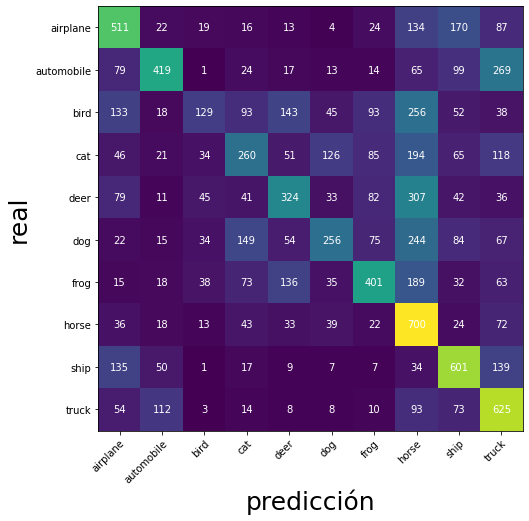

In [381]:
print(f'Accuracy: {(np.array(y_test) == y_pred).sum() / len(y_test)}')

print(f'\n{classification_report(y_test, y_pred, target_names=classes)}')
c_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(c_matrix) #cmap='gist_gray'
# We want to show all ticks...
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
# ... and label them with the respective list entries
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, c_matrix[i, j],
                       ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.xlabel('predicción', fontsize=25)
plt.ylabel('real', fontsize=25)
plt.show()

## Plot Some examples

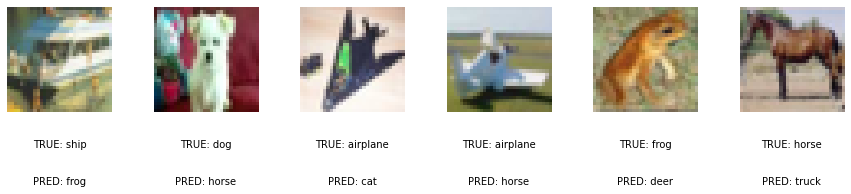

In [389]:
n_to_show = 6
indices = np.random.choice(range(len(X_test)), n_to_show)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = X[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'TRUE: '+classes[y[idx]], fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'PRED: '+classes[y_pred[idx]], fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)